In [0]:
import pandas as pd

df = pd.read_csv('house_data.csv')
dataset = df.values

# df
# dataset.shape, dataset

In [0]:
x = dataset[:, 0:13]
y = dataset[:, 13]

# x.shape, y.shape

In [0]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
TransformY = preprocessing.MinMaxScaler()
y_scale = TransformY.fit_transform(y.reshape(y.shape[0],1))

#x_scale

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size=0.2)

# x_train.shape

In [0]:
from keras.models import Sequential
from keras.layers import Dense
#8,6,1
model = Sequential([
    Dense(10, activation='relu', input_shape=(13,)),
    Dense(8, activation='relu'),
    Dense(1, kernel_initializer='normal')])

In [0]:
from keras import optimizers

model.compile(loss='mean_squared_error', optimizer='adam')
# model.summary()

In [0]:
import timeit
start = timeit.default_timer()

In [136]:
trained_model = model.fit(x_train, y_train, batch_size=16, epochs=100, validation_split=0.2)
history = trained_model.history

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 1s 4ms/step - loss: 0.1764 - val_loss: 0.1689
Epoch 2/100
323/323 [==============================] - 0s 361us/step - loss: 0.1394 - val_loss: 0.1265
Epoch 3/100
323/323 [==============================] - 0s 328us/step - loss: 0.1005 - val_loss: 0.0909
Epoch 4/100
323/323 [==============================] - 0s 332us/step - loss: 0.0714 - val_loss: 0.0665
Epoch 5/100
323/323 [==============================] - 0s 342us/step - loss: 0.0558 - val_loss: 0.0547
Epoch 6/100
323/323 [==============================] - 0s 323us/step - loss: 0.0479 - val_loss: 0.0470
Epoch 7/100
323/323 [==============================] - 0s 330us/step - loss: 0.0413 - val_loss: 0.0407
Epoch 8/100
323/323 [==============================] - 0s 322us/step - loss: 0.0359 - val_loss: 0.0349
Epoch 9/100
323/323 [==============================] - 0s 309us/step - loss: 0.0316 - val_loss: 0.0299
Epoch 10/100
323/323 [========

In [0]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=11)
x_train_pca = pca.fit_transform(x_train)
x_test_pca  = pca.transform(x_test)
explained_var = pca.explained_variance_ratio_
np.sum(explained_var[0:11])
pca_out = explained_var[0:11]

In [0]:
from keras.models import Sequential
from keras.layers import Dense
#128,16,1
model_pca = Sequential([
    Dense(10, activation='relu', input_shape=(11,)),
    Dense(8, activation='relu'),
    Dense(1, kernel_initializer='normal')])

In [0]:
model_pca.compile(loss='mean_squared_error', optimizer='adam')

In [140]:
trained_model_pca = model_pca.fit(x_train_pca, y_train, batch_size=16, epochs=100, validation_split=0.2)
history_pca = trained_model_pca.history

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 1s 4ms/step - loss: 0.1985 - val_loss: 0.1975
Epoch 2/100
323/323 [==============================] - 0s 353us/step - loss: 0.1721 - val_loss: 0.1714
Epoch 3/100
323/323 [==============================] - 0s 335us/step - loss: 0.1477 - val_loss: 0.1437
Epoch 4/100
323/323 [==============================] - 0s 317us/step - loss: 0.1203 - val_loss: 0.1118
Epoch 5/100
323/323 [==============================] - 0s 318us/step - loss: 0.0899 - val_loss: 0.0772
Epoch 6/100
323/323 [==============================] - 0s 308us/step - loss: 0.0590 - val_loss: 0.0467
Epoch 7/100
323/323 [==============================] - 0s 344us/step - loss: 0.0362 - val_loss: 0.0303
Epoch 8/100
323/323 [==============================] - 0s 319us/step - loss: 0.0268 - val_loss: 0.0243
Epoch 9/100
323/323 [==============================] - 0s 317us/step - loss: 0.0234 - val_loss: 0.0219
Epoch 10/100
323/323 [========

In [143]:
max_loss = max(history['val_loss'])
min_loss = min(history['val_loss'])

max_loss_pca = max(history_pca['val_loss'])
min_loss_pca = min(history_pca['val_loss'])

print('Max_loss and Min_loss are', max_loss,',', min_loss,'.')
print('Max_loss_pca and Min_loss_pca are', max_loss_pca,',', min_loss_pca,'.')

Max_loss and Min_loss are 0.16885385965859448 , 0.008811200713094922 .
Max_loss_pca and Min_loss_pca are 0.19748268607589933 , 0.006025095210471018 .


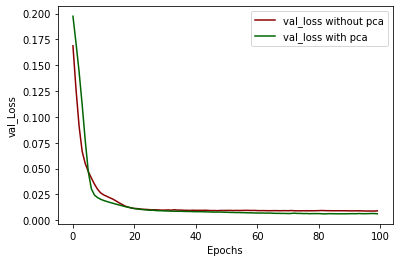

In [145]:
import matplotlib.pyplot as plt

Loss_ = history['val_loss']
Loss_pca = history_pca['val_loss']

plt.xlabel('Epochs')
plt.ylabel('val_Loss')
plt.plot(Loss_, 'darkred')
plt.plot(Loss_pca,'darkgreen')
plt.legend(['val_loss without pca','val_loss with pca'])
plt.show()